In [1]:
# Importing Necessary Libraries
import os
import pandas as pd
from wordcloud import WordCloud 
import matplotlib.pyplot as plt
import seaborn as sns

Dataset source : [link](https://www.kaggle.com/datasets/andrezaza/clapper-massive-rotten-tomatoes-movies-and-reviews)

In [2]:
# Loading the dataset
df = pd.read_csv("../../data/movie-raw-data-csv/rotten_tomatoes_reviews.csv", low_memory=False)
df.sample(3).T

,1081873,985293,981301
id,advanced_style_2014,derailed,pink_panther
reviewId,2226007,1454776,1484861
creationDate,2014-10-02,2005-11-18,2006-02-17
criticName,Leigh Paatsch,Thomas Delapa,John Wirt
isTopCritic,False,False,False
originalScore,3/5,1.5/4,NaN
reviewState,fresh,rotten,rotten
publicatioName,Herald Sun (Australia),Boulder Weekly,"Advocate (Baton Rouge, LA)"
reviewText,These sisters of a certain age are strictly do...,Sidetracked by a slew of unbelievable coincide...,A pale Pink Panther.
scoreSentiment,POSITIVE,NEGATIVE,NEGATIVE


In [3]:
# The number of rows and columns in the dataset
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")

Number of rows: 1444963
Number of columns: 11


In [4]:
# Checking column Dtypes, non-null counts, and size
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1444963 entries, 0 to 1444962
Data columns (total 11 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   id              1444963 non-null  object
 1   reviewId        1444963 non-null  int64 
 2   creationDate    1444963 non-null  object
 3   criticName      1444963 non-null  object
 4   isTopCritic     1444963 non-null  bool  
 5   originalScore   1009745 non-null  object
 6   reviewState     1444963 non-null  object
 7   publicatioName  1444963 non-null  object
 8   reviewText      1375738 non-null  object
 9   scoreSentiment  1444963 non-null  object
 10  reviewUrl       1234038 non-null  object
dtypes: bool(1), int64(1), object(9)
memory usage: 111.6+ MB


In [5]:
# Displaying statistics of the dataset (Numerical columns)
df.describe(include='int').T

,count,mean,std,min,25%,50%,75%,max
reviewId,1444963.0,9.035203e+06,2.575716e+07,1.0,1610366.5,2200337.0,2587023.5,102796154.0


In [6]:
# Displaying statistics of the dataset (Categorical columns)
df.describe(include=['object', 'category']).T

,count,unique,top,freq
id,1444963,69263,parasite_2019,954
creationDate,1444963,8510,2000-01-01,48083
criticName,1444963,15510,Emanuel Levy,13274
originalScore,1009745,1729,3/5,116711
reviewState,1444963,2,fresh,963799
publicatioName,1444963,2707,New York Times,19853
reviewText,1375738,1359771,Parental Content Review,236
scoreSentiment,1444963,2,POSITIVE,963799
reviewUrl,1234038,1138350,http://www.jackiekcooper.com,782


In [7]:
# Identify number of unique users
print(f"Number of unique users: {df['criticName'].nunique()}")

Number of unique users: 15510


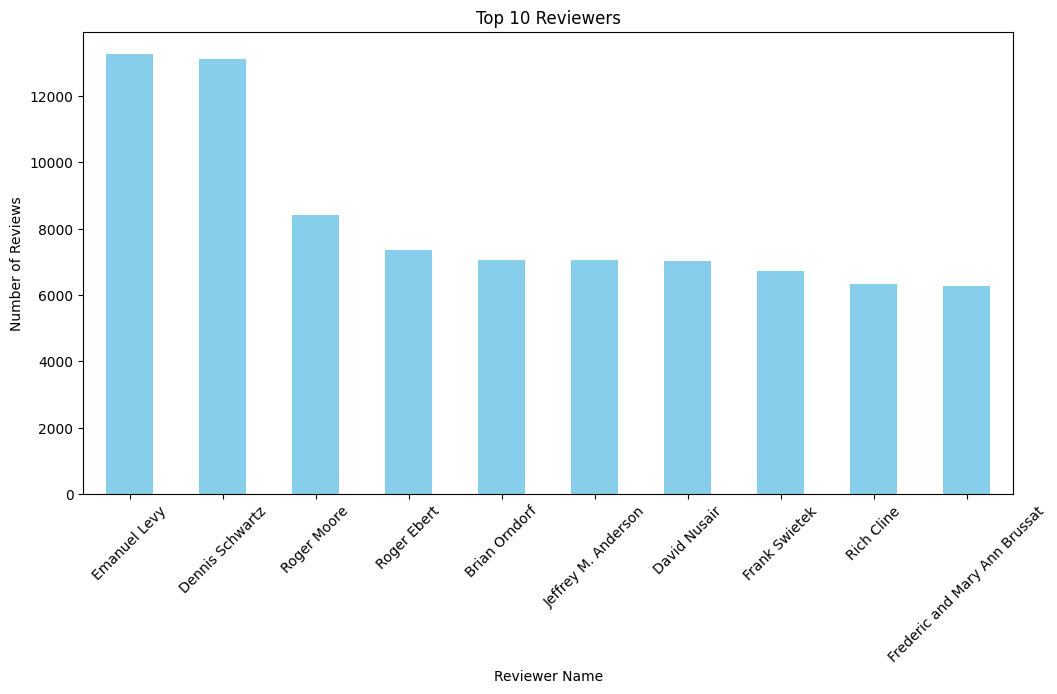

In [8]:
# Identify top reviewers
top_reviewers = df['criticName'].value_counts().head(10)
top_reviewers.plot(kind='bar', figsize=(12, 6), color='skyblue')
plt.title('Top 10 Reviewers')
plt.xlabel('Reviewer Name')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)
plt.show()

In [9]:
# Identify cout of POSITIVE and NEGATIVE reviews
review_counts = df['scoreSentiment'].value_counts()
review_counts       

scoreSentiment
POSITIVE    963799
NEGATIVE    481164
Name: count, dtype: int64

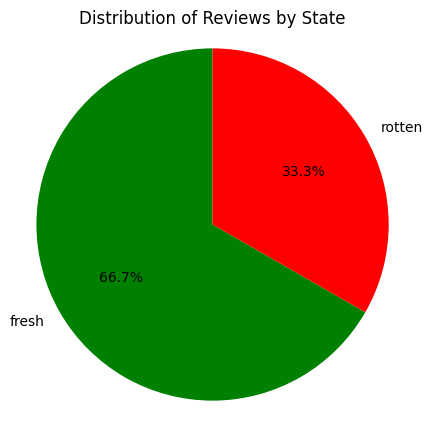

In [10]:
# Identify reviewState counts

# Count the review states
review_state_counts = df['reviewState'].value_counts()

# Define colors (extend if more than 2 states)
colors = ['green', 'red'] + ['gray'] * (len(review_state_counts) - 2)

# Plot as pie chart with percentages
plt.figure(figsize=(5, 5))
plt.pie(
    review_state_counts,
    labels=review_state_counts.index,
    autopct='%1.1f%%',  # Show percentages
    startangle=90,      # Rotate start angle
    colors=colors[:len(review_state_counts)]
)
plt.title('Distribution of Reviews by State')
plt.axis('equal')  # Equal aspect ratio
plt.show()

Image already exists at ../../plots/wordcloud_rotten_reviews.png, skipping generation.


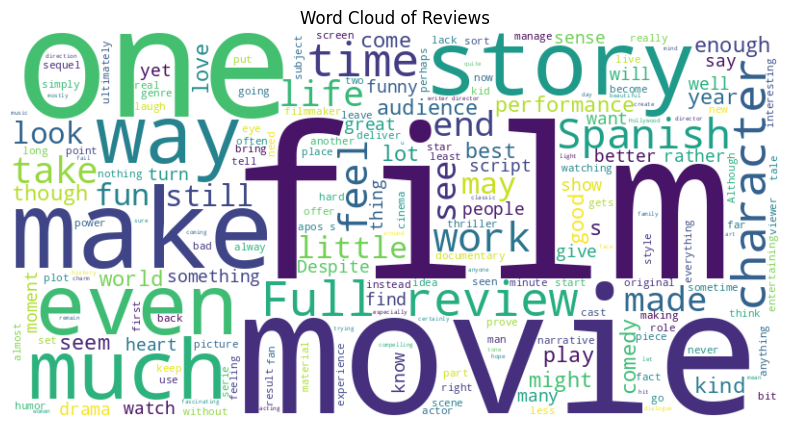

In [11]:
# Word cloud visualization of reviews

SAVED_IMAGE_PATH = "../../plots/wordcloud_rotten_reviews.png"
# Check if file exists
if not os.path.exists(SAVED_IMAGE_PATH):
    print("Generating new word cloud image...")
    # Generate word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white') \
        .generate(' '.join(df['reviewText'].dropna()))
    # Save to file
    wordcloud.to_file(SAVED_IMAGE_PATH)
else:
    print(f"Image already exists at {SAVED_IMAGE_PATH}, skipping generation.")
    # If you still want to load the existing image:
    wordcloud = plt.imread(SAVED_IMAGE_PATH)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Reviews')
plt.show()

Image already exists at ../../plots/wordcloud_rotten_positive_reviews.png, skipping generation.


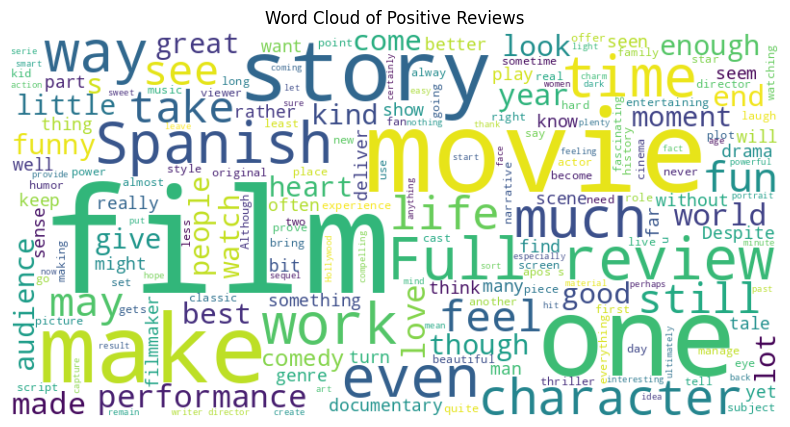

In [12]:
# Word cloud visualization of positive reviews

SAVED_IMAGE_PATH = "../../plots/wordcloud_rotten_positive_reviews.png"
positive_reviews = df.loc[df['scoreSentiment'] == 'POSITIVE', 'reviewText'].dropna()
# Check if file exists
if not os.path.exists(SAVED_IMAGE_PATH):
    print("Generating new word cloud image for POSITIVE reviews...")
    wordcloud = WordCloud(width=800, height=400, background_color='white') \
        .generate(' '.join(positive_reviews))
    wordcloud.to_file(SAVED_IMAGE_PATH)
else:
    print(f"Image already exists at {SAVED_IMAGE_PATH}, skipping generation.")
    wordcloud = plt.imread(SAVED_IMAGE_PATH)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud if isinstance(wordcloud, WordCloud) else wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Positive Reviews')
plt.show()

Image already exists at ../../plots/wordcloud_rotten_negative_reviews.png, skipping generation.


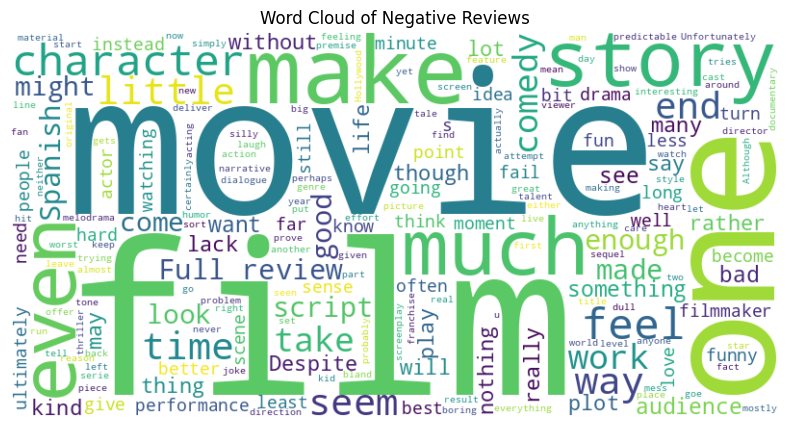

In [13]:
SAVED_IMAGE_PATH = "../../plots/wordcloud_rotten_negative_reviews.png"

# Filter only negative reviews
negative_reviews = df.loc[df['scoreSentiment'] == 'NEGATIVE', 'reviewText'].dropna()

# Check if file exists
if not os.path.exists(SAVED_IMAGE_PATH):
    print("Generating new word cloud image for NEGATIVE reviews...")
    wordcloud = WordCloud(width=800, height=400, background_color='white') \
        .generate(' '.join(negative_reviews))
    wordcloud.to_file(SAVED_IMAGE_PATH)
else:
    print(f"Image already exists at {SAVED_IMAGE_PATH}, skipping generation.")
    wordcloud = plt.imread(SAVED_IMAGE_PATH)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud if isinstance(wordcloud, WordCloud) else wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Negative Reviews')
plt.show()